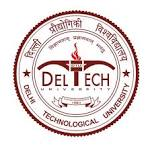  
    
<h1>Exploratory Data Analysis : Car Analysis Project Work </h1>
<img src="https://github.com/Ashwani-ML-AL/Images/blob/master/Car-Sale.jpg?raw=true" width="1050" height="20" style="float:left"/> 
<h1> By : Arul Pandita </h1>

### Table of Contents
- 1. [Problem Statement](#section1)</br>
    - 1.1 [Introduction](#section101)<br/>
    - 1.2 [Data source and data set](#section102)<br/>
- 2. [Load the packages and data](#section2)</br>
- 3. [Data profiling](#section3)</br>
    - 3.1 [dtypes](#section301)<br/>
    - 3.2 [head](#section302)<br/>
    - 3.3 [describe](#section303)<br/>
    - 3.4 [sample](#section304)<br/>
    - 3.5 [Pandas profiling](#section305)<br/>
    - 3.6 [Initial observations](#section306)<br/>
    - 3.7 [Final observations](#section307)<br/>
- 4. [Data normalization](#section4)</br>
    - 4.1 [Standardize column headers to lower case](#section401)<br/>
    - 4.2 [Delete Duplicate Records & Create new Dataset](#section402)<br/>
    - 4.3 [Missing data and its imputation](#section403)<br/>
    - 4.4 [Outlier Treatment](#section404)<br/>
    - 4.5 [Handling NaN data in categorical variables](#section405)<br/>            
    - 5. [Identify patterns in the data](#section5)</br>
    - 5.1 [Milage Distribution Group](#section501)<br/>
    - 5.2 [Price Distribution Group](#section502)<br/>
    - 5.3 [Car Manufacturing Count ](#section503)<br/>
    - 5.4 [Car Manufacturing Engine Group](#section504)<br/>
    - 5.5 [Pandas profiling](#section505)<br/>
- 6. [Plotting](#section6)</br>
     - 6.1 [Mileage vs Price](#section601)<br/>
     - 6.2 [Price Vs Engine](#section602)<br/>
     - 6.3 [Top Ten Cars](#section603)<br/>
     - 6.4 [Mileage Vs Engine Type](#section604)<br/>
     - 6.5 [Milage Histrogram](#section605)<br/>
     - 6.6 [Registration Vs Engine Type ( Bar Chart)](#section606)<br/>
     - 6.7 [Registration Vs Engine Type ( Pie Chart)](#section607)<br/>
     - 6.8 [Registration Vs Drive ( Pie Chart)](#section608)<br/>
     - 6.9 [Correlation of Features](#section609)<br/>
- 7. [Conclusion](#section7)<br/>

<a id=section1></a> 
## 1. Problem Statement !

Use basics understanding of Pandas,matplotlib and Seaborn and the basic commands of (EDA) which includes cleaning, munging, combining, reshaping, slicing, dicing, and transforming data for analysis purpose.

Exploratory Data Analysis on 'New Car Sales' data Analyzing the car sales data with :

```
   Finding patterns in Data
   Determining relationships in Data
   Checking of assumptions ```
   

<a id=section101></a> 
### 1.1. Introduction
This Exploratory Data Analysis on New Car Sales is to apply Python skills learned till now on a structured data set including loading, inspecting, wrangling, exploring, and drawing conclusions from data. The notebook has observations with each step in order to explain approach taken for the data set.

<a id=section102></a> 
### 1.2. Data source and dataset

__a__.  Data of Car Sales is Collected over a period of Time? 

- __Name__: "New Car Sales"
- __Sponsoring Organization__: Open Sourcing 
- __Year__: 2020
- __Description__: 
  "The dataset consists of the information about different car sales in over a period of time.Various variables present in the    dataset includes data of car, model, price, drive etc."

  "The dataset comprises of 9576 observations of 10 columns."

Data: https://github.com/insaid2018/Term-2/blob/master/Term-I-II%20EDA%20Project%20Datasets.ipynb <br/>

__b__. Is it a sample? If yes, was it properly sampled?
- Yes, it is a sample. We don't have official information about the data collection method, but it appears *not* to be a random sample, so we can assume that it is not representative. 

# Column Name and  Description.
    Column Name	                         Description
    car-------------------------------------car brand name
    model-----------------------------------Available car different Variants
    year------------------------------------purchasing Year
    body------------------------------------Body type-Hatchback, Sedan, Crossover etc
    mileage---------------------------------car Mileage
    engV------------------------------------Engine version
    engType---------------------------------Car Fuel type - Petrol, Diesel, gas etc
    drive-----------------------------------Wheel Drive Front, back
    registration----------------------------Check if the vechile is registered
    price-----------------------------------Price of Car in $

<a id=section2></a> 
### 2. Load the packages and data 

In [1]:
import sys                                                                      # Import packages
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie, axis, show
%matplotlib inline 
from subprocess import check_output



import warnings                                                                 # Ignore warning related to pandas_profiling
warnings.filterwarnings('ignore') 

pd.set_option('display.max_columns', 100)                                       # Display all dataframe columns in outputs (it has 27 columns, which is wider than the notebook)
                                                                                # This sets it up to dispaly with a horizontal scroll instead of hiding the middle columns

dt_car = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/car_sales.csv",encoding='cp1252') 

# Load in the dataset as mh

print('done')

done


<a id=section3></a> 
### 3. Data Profiling
I will be review the data types and Car Sales Data to understand the variables

In the upcoming sections I will first understand our dataset using various pandas functionalities<br/>
Then with the help of pandas profiling,will find which columns of our dataset need preprocessing<br/>
In preprocessing I will deal with erronous and missing values of columns.<br/>
Again I will do pandas profiling to see how preprocessing have transformed our dataset.


<a id=section301></a> 
##### 3.1 Datatype
To gain insights from data I will be looking into each aspect of it very carefully.<br/> 
I will start with observing few rows and columns of data both from the starting and from the end<br/>


In [2]:
dt_car.shape            # This will print the number of rows and comlumns of the Data Frame

(9576, 10)

In [3]:
dt_car.columns                                   # This will print names of all columns

Index(['car', 'price', 'body', 'mileage', 'engV', 'engType', 'registration',
       'year', 'model', 'drive'],
      dtype='object')

In [4]:
dt_car.dtypes

car              object
price           float64
body             object
mileage           int64
engV            float64
engType          object
registration     object
year              int64
model            object
drive            object
dtype: object

<a id=section302></a> 
##### 3.2 Head

In [5]:
dt_car.head(2)                 # Display the first 2 rows of the data set

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear


In [6]:
dt_car.tail(2)               # This will print the last 2 rows of the Data Frame

,car,price,body,mileage,engV,engType,registration,year,model,drive
9574,Lexus,16999.0,sedan,150,3.5,Gas,yes,2008,ES 350,front
9575,Audi,22500.0,other,71,3.6,Petrol,yes,2007,Q7,full


<a id=section303></a> 
##### 3.3 Describe

In [7]:
dt_car.describe(include = 'all')             # Descriptive statistics for the numerical variables

,car,price,body,mileage,engV,engType,registration,year,model,drive
count,9576,9576.000000,9576,9576.000000,9142.000000,9576,9576,9576.000000,9576,9065
unique,87,NaN,6,NaN,NaN,4,2,NaN,888,3
top,Volkswagen,NaN,sedan,NaN,NaN,Petrol,yes,NaN,E-Class,front
freq,936,NaN,3646,NaN,NaN,4379,9015,NaN,199,5188
mean,NaN,15633.317316,NaN,138.862364,2.646344,NaN,NaN,2006.605994,NaN,NaN
std,NaN,24106.523436,NaN,98.629754,5.927699,NaN,NaN,7.067924,NaN,NaN
min,NaN,0.000000,NaN,0.000000,0.100000,NaN,NaN,1953.000000,NaN,NaN
25%,NaN,4999.000000,NaN,70.000000,1.600000,NaN,NaN,2004.000000,NaN,NaN
50%,NaN,9200.000000,NaN,128.000000,2.000000,NaN,NaN,2008.000000,NaN,NaN
75%,NaN,16700.000000,NaN,194.000000,2.500000,NaN,NaN,2012.000000,NaN,NaN


In [8]:
dt_car.isnull().sum()  # Sum of null value columns 


car               0
price             0
body              0
mileage           0
engV            434
engType           0
registration      0
year              0
model             0
drive           511
dtype: int64

<a id=section304></a> 
##### 3.4 Sample

In [9]:
dt_car.sample(3)                           # Display a random 3 rows from the data set

,car,price,body,mileage,engV,engType,registration,year,model,drive
3923,Opel,9350.0,sedan,166,2.2,Petrol,yes,2009,Vectra C,front
8190,GAZ,980.0,sedan,80,2.5,Gas,yes,2004,3110,NaN
6545,Renault,9450.0,vagon,215,1.5,Diesel,yes,2008,Laguna,front


In [10]:
dt_car.info()                             # This will give Index, Datatype and Memory information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9576 entries, 0 to 9575
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   car           9576 non-null   object 
 1   price         9576 non-null   float64
 2   body          9576 non-null   object 
 3   mileage       9576 non-null   int64  
 4   engV          9142 non-null   float64
 5   engType       9576 non-null   object 
 6   registration  9576 non-null   object 
 7   year          9576 non-null   int64  
 8   model         9576 non-null   object 
 9   drive         9065 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 748.2+ KB


#### Observations

As we can see there is huge discrepancies in mileage and engV column of the dataset,seems to have outliers as range is very high.Also EngV and Drive columns contains maximum NULL values.

###### Some Questions i have which will help me in deep dive analysis 
- How many cars for each module sold in each year?
- Highest Cars body sold most ?
- Highest Car sold each year ?
- Which Car model gives highest average ?
- Are most of the registration done ?
- Which is costly car ?
- Which brand of cars is the most selling brand?
- Huge range in milage, so break into range 
- Null values .. change to average,mode..
- Duplicate records .. delete them
- Huge Price Range,so break in to range 

<a id=section305></a> 
##### 3.5 Profiling

<a id=section305></a> 
##### Pandas Profiling
By pandas profiling, an interactive HTML report gets generated which contins all the information about the columns of the dataset, like the counts and type of each column.<br/>
 Detailed information about each column, coorelation between different columns and a sample of dataset.<br/>
 It gives us visual interpretation of each column in the data.<br/>
 Spread of the data can be better understood by the distribution plot.<br/>
 Grannular level analysis of each column.

In [386]:
import pandas_profiling                               # Get a quick overview for all the variables using pandas_profiling                                         
profile = pandas_profiling.ProfileReport(dt_car)
print('done')

done


In [233]:
#profile.to_notebook_iframe() # Just in case i want in it in sheet itself
#profile

In [387]:
profile.to_file("car_pre_profiling_2020.html")    

I have done Pandas Profiling before preprocessing dataset, so we can get initial observations from the dataset in better visual aspects, to find correlation matrix and sample data. File was saved as html file car_pre_profiling_2020.html.

Will take a look at the file and see what useful insight you can develop from it.

Initial observation as a result from profiling of Carsale Dataset can be seen in

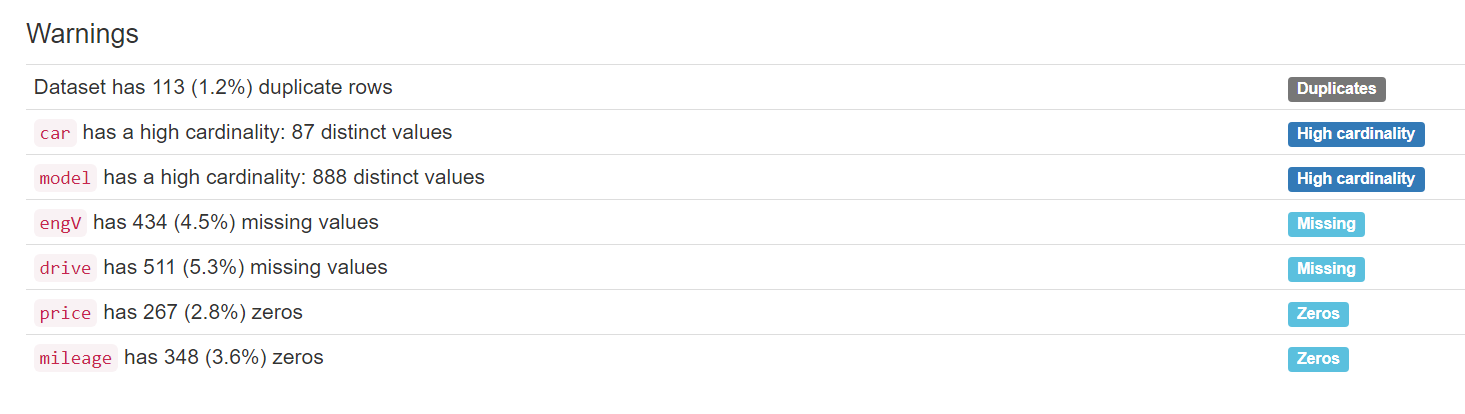


#### Summary of the various columns in this dataset
- <strong>car</strong>: (String Datatype) The company which manufactured the car. It has been noted that this column has high cardinality(87 distinct values)
- <strong>price</strong> (Int Datatype) The price for which the car was sold. There are 267 rows with the price as zero. Assumption done here is that these were given to charity. 
- <strong>body</strong>: (String Datatype) The body type of the car sold. Sedan seems to be the maximum occuring value.
- <strong>mileage</strong>: (Int Datatype) Number of miles that the car has been run for till now. The value in this column could be in thousand multiplers. There were some cars sold with mileage of zero indicating that the dealership sells new vehicles along with old ones. Also the outliers >900 are only 5 in number also there are other value surrounding it which inclines us more to think that these could not be outliers.
- <strong>engV</strong>: (Float Datatype) The engine volume. There are 434 null values in this column which i am thinking of replacing with the median of the data.
- <strong>engType</strong>: (String datatype) The fuel type consumed by the engine. This nominal value has only 4 distinct values petrol, gas, diesel and other. 
- <strong>registration</strong>: (boolean Datatype) Just Indicates whether the vehicle was registered or not. Doesn't seem to add much value to the data will be dropping this column.
- <strong>year</strong>: (int Datatype) The year in which the car was sold.Values range from 1953 to 2016.
- <strong>model</strong>: (String Datatype) The model name under the brand lister as car. We are going to drop this column as well as it has very high cardinality(888 unique values)
- <strong>drive</strong>: ( String Datatype) Drive type of the vehicle. Only 4 possible values. There are 511 missing values and we are thinking of replacing these values with the mode of the data as this is categorical data. 

In [75]:
#carsale.replace({'engType': 'Other', 'price': 0, 'mileage': 0}, np.nan, inplace=True)

<a id=section306></a> 
##### 3.6 Initial Observation

<a id=section306></a> 
### 3.6. Initial observations:

- Summary of data types in this dataset:
 - <em>Numeric</em>: <strong>Year</strong> (integer)
 - <em>Numeric</em>: <strong>Price</strong> (float)
 - <em>Numeric</em>: <strong>Engine Version(engV)</strong> (float)
 - <em>Numeric</em>: <strong>Mileage</strong> (integer)
 - <em>Object</em>: Everything else

###### Dataset statistics:

- Number of variables	: 10 
- Number of observations	: 9576
- Missing cells	: 945
- Missing cells (%)	: 1.0%
- Duplicate rows	: 113 
- Duplicate rows (%)	: 1.2% 
- Total size in memory	: 748.2 KiB 
- Average record size in memory	: 80.0 B 

###### Variable types:

- CATEGORY	: 5
- NUMBER	: 4
- BOOLEAN	: 1 
                         


- The following variables have null values that may need to addressed.
                           
- <strong>DATASET</strong>: Dataset has 113 (1.2%) duplicate rows,needs investigation?
- <strong>PRICE</strong>: 267 (2.8%) zeros Price,need to investigate why?
- <strong>MILAGE</strong>:Mileage has 348 (3.6%) zeros,need to investigate why?
- <strong>DRIVE</strong>: Drive has 511 (5.3%) missing values,need to investigate why?
- <strong>ENGINE Version</strong>: Engine Version has 434 (4.5%) missing values,need to investigate why?
- <strong>CAR</strong>: Car has a high cardinality: 87 distinct values	High cardinality.
- <strong>Model</strong>:Model has a high cardinality: 888 distinct values 




### Find out the duplicate rows in the data.


In [11]:
duplicate = dt_car[dt_car.duplicated()] 
print("Duplicate Rows :") 
duplicate

Duplicate Rows :


,car,price,body,mileage,engV,engType,registration,year,model,drive
18,Nissan,16600.0,crossover,83,2.0,Petrol,yes,2013,X-Trail,full
42,Mercedes-Benz,20400.0,sedan,190,1.8,Gas,yes,2011,E-Class,rear
70,Mercedes-Benz,0.0,crossover,0,3.0,Diesel,yes,2016,GLE-Class,full
86,Toyota,103999.0,crossover,0,4.5,Diesel,yes,2016,Land Cruiser 200,full
98,Mercedes-Benz,20400.0,sedan,190,1.8,Gas,yes,2011,E-Class,rear
...,...,...,...,...,...,...,...,...,...,...
9156,Volkswagen,15700.0,sedan,110,1.8,Petrol,yes,2011,Passat B7,front
9163,Mercedes-Benz,20500.0,sedan,222,5.5,Petrol,yes,2006,S 500,rear
9164,VAZ,3900.0,hatch,121,1.4,Petrol,yes,2008,1119,front
9169,Hyundai,12900.0,crossover,49,2.7,Petrol,yes,2008,Tucson,full


There are about 113 duplicate records,we need to delete them.

In [12]:
dt_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9576 entries, 0 to 9575
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   car           9576 non-null   object 
 1   price         9576 non-null   float64
 2   body          9576 non-null   object 
 3   mileage       9576 non-null   int64  
 4   engV          9142 non-null   float64
 5   engType       9576 non-null   object 
 6   registration  9576 non-null   object 
 7   year          9576 non-null   int64  
 8   model         9576 non-null   object 
 9   drive         9065 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 748.2+ KB


##### Find the details of Price and How many values are "NaN"

In [13]:
print("price")
print("price price: ",dt_car["price"].min())
print("Maximum price: ",dt_car["price"].max())
print("How many values are NaN?: ", pd.isnull(dt_car['price']).sum())

price
price price:  0.0
Maximum price:  547800.0
How many values are NaN?:  0


No NaN Value present in Price, but range is from 0 to 547800

### Find the details of Milage and how many values are "NaN"

In [14]:
print("mileage")
print("Minimum value: ",dt_car["mileage"].min())
print("Maximum value: ",dt_car["mileage"].max())
print("How many values are NaN?: ", pd.isnull(dt_car['mileage']).sum())

mileage
Minimum value:  0
Maximum value:  999
How many values are NaN?:  0


No Nan Value present, minimum 0 and maximun 999 milage present in data

### Count the number of distinct Cars Categories in the list .

In [15]:
print("Count of distinct responses for Gender:", len(set(dt_car['car']))) # Learn more about the variable Gender, which appears not to be standardized with 49 distinct responses.
print("Distinct responses for Gender:", set(dt_car['car']))  

Count of distinct responses for Gender: 87
Distinct responses for Gender: {'Ferrari', 'Rolls-Royce', 'Ford', 'Moskvich-AZLK', 'Kia', 'Hafei', 'Land Rover', 'Dadi', 'Fisker', 'Cadillac', 'TATA', 'Lamborghini', 'Daewoo', 'BYD', 'Rover', 'BMW', 'Other-Retro', 'ZAZ', 'FAW', 'Porsche', 'Acura', 'Mitsubishi', 'Citroen', 'Samand', 'Suzuki', 'Aston Martin', 'Wartburg', 'Renault', 'ZX', 'Groz', 'MINI', 'Mazda', 'Bogdan', 'Mercury', 'Buick', 'Nissan', 'Moskvich-Izh', 'Jeep', 'Dodge', 'Changan', 'Hummer', 'Lincoln', 'Huanghai', 'Chrysler', 'JAC', 'Dacia', 'Samsung', 'Lancia', 'Audi', 'Mercedes-Benz', 'Bentley', 'GMC', 'Toyota', 'Saab', 'Aro', 'GAZ', 'Alfa Romeo', 'Opel', 'Hyundai', 'Barkas', 'Lifan', 'Volkswagen', 'Honda', 'Peugeot', 'VAZ', 'Maserati', 'Geely', 'ËUAZ', 'Chevrolet', 'Smart', 'MG', 'Great Wall', 'Lexus', 'Subaru', 'Fiat', 'Daihatsu', 'UAZ', 'SsangYong', 'Seat', 'Isuzu', 'Jaguar', 'Tesla', 'Infiniti', 'SMA', 'Skoda', 'Chery', 'Volvo'}


In [16]:
count = dt_car['car'].value_counts()  ##### Count the number of Cars in each Categories
print(count) 

Volkswagen       936
Mercedes-Benz    921
BMW              694
Toyota           541
VAZ              489
                ... 
FAW                1
ZX                 1
TATA               1
Fisker             1
Barkas             1
Name: car, Length: 87, dtype: int64


In [17]:
count = dt_car['drive'].value_counts()     #### Count drive type 
print(count) 
dt_car.isnull().sum()                       #### Count the number of Null values in the Datafarme

front    5188
full     2500
rear     1377
Name: drive, dtype: int64


car               0
price             0
body              0
mileage           0
engV            434
engType           0
registration      0
year              0
model             0
drive           511
dtype: int64

<a id=section307></a> 
##### 3.7 Final Observation

#### Summary of the various columns in this dataset
- <strong>car</strong>: (String Datatype) The company which manufactured the car. It has been noted that this column has high cardinality(87 distinct values)
- <strong>price</strong> (Int Datatype) The price for which the car was sold. There are 267 rows with the price as zero. Assumption done here is that these were given to charity. 
- <strong>body</strong>: (String Datatype) The body type of the car sold. Sedan seems to be the maximum occuring value.
- <strong>mileage</strong>: (Int Datatype) Number of miles that the car has been run for till now. The value in this column could be in thousand multiplers. There were some cars sold with mileage of zero indicating that the dealership sells new vehicles along with old ones. Also the outliers >900 are only 5 in number also there are other value surrounding it which inclines us more to think that these could not be outliers.
- <strong>engV</strong>: (Float Datatype) The engine volume. There are 434 null values in this column which i am thinking of replacing with the median of the data.
- <strong>engType</strong>: (String datatype) The fuel type consumed by the engine. This nominal value has only 4 distinct values petrol, gas, diesel and other. 
- <strong>registration</strong>: (boolean Datatype) Just Indicates whether the vehicle was registered or not. Doesn't seem to add much value to the data will be dropping this column.
- <strong>year</strong>: (int Datatype) The year in which the car was sold.Values range from 1953 to 2016.
- <strong>model</strong>: (String Datatype) The model name under the brand lister as car. We are going to drop this column as well as it has very high cardinality(888 unique values)
- <strong>drive</strong>: ( String Datatype) Drive type of the vehicle. Only 4 possible values. There are 511 missing values and we are thinking of replacing these values with the mode of the data as this is categorical data. 


<a id=section4></a> 
### 4. Data Normalization

<a id=section401></a> 

### 4.1. Standardize all column headers to lower case 

In [18]:
dt_car.columns = map(str.lower, dt_car.columns)   # Make sure to follow this step
                                                  # map() function returns a list of results after applying the given function
                                                  # to each item of a given iterable.
dt_car.dtypes                                     # Confirm that all variable names are now lower case          

car              object
price           float64
body             object
mileage           int64
engv            float64
engtype          object
registration     object
year              int64
model            object
drive            object
dtype: object

<a id=section402></a> 

### 4.2 Delete the duplicate rows and create a new Dataframe


In [19]:
# Create a new DataFrame with no Duplicate values
dt_car_v=dt_car
dt_car_v.drop_duplicates(subset=None,keep='first',inplace=True)
dt_car_v.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9463 entries, 0 to 9575
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   car           9463 non-null   object 
 1   price         9463 non-null   float64
 2   body          9463 non-null   object 
 3   mileage       9463 non-null   int64  
 4   engv          9029 non-null   float64
 5   engtype       9463 non-null   object 
 6   registration  9463 non-null   object 
 7   year          9463 non-null   int64  
 8   model         9463 non-null   object 
 9   drive         8953 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 813.2+ KB


In [20]:
dt_car.drop_duplicates(subset=None,keep='first',inplace=True)
dt_car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9463 entries, 0 to 9575
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   car           9463 non-null   object 
 1   price         9463 non-null   float64
 2   body          9463 non-null   object 
 3   mileage       9463 non-null   int64  
 4   engv          9029 non-null   float64
 5   engtype       9463 non-null   object 
 6   registration  9463 non-null   object 
 7   year          9463 non-null   int64  
 8   model         9463 non-null   object 
 9   drive         8953 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 813.2+ KB


In [21]:
duplicate = dt_car_v[dt_car_v.duplicated()]   # Check for duplicate again 
print("Duplicate Rows :") 
duplicate

Duplicate Rows :


,car,price,body,mileage,engv,engtype,registration,year,model,drive


In [22]:
duplicate = dt_car[dt_car.duplicated()]   # Check for duplicate again 
print("Duplicate Rows :") 
duplicate

Duplicate Rows :


,car,price,body,mileage,engv,engtype,registration,year,model,drive


<a id=section403></a>
### 4.3. Missing Data and its imputation

In [23]:
#missing data
total = dt_car_v.isnull().sum().sort_values(ascending=False)
percent = ((dt_car_v.isnull().sum()/dt_car_v.isnull().count())*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
#missing_data.head(20)
print(missing_data)

              Total   Percent
drive           510  5.389411
engv            434  4.586283
model             0  0.000000
year              0  0.000000
registration      0  0.000000
engtype           0  0.000000
mileage           0  0.000000
body              0  0.000000
price             0  0.000000
car               0  0.000000


<a id=section404></a> 
### 4.4. Outliers Treatment

For the purpose of this analysis, simply replace any out-of-range mileage values with "NaN", rather than deleting the rows from the data set. In a more detailed analysis it could be worth looking more closely at the rows with out-of-range mileage and deciding whether it makes more sense to remove them.

Mileage column has 8186 records which is having mileage greater than 35 and 348 records having zero mileage.

 Outlier treatment
Simple replace outlers with mean,mode and median ( DataFrame : dt_car  )<br/>
Create a Range and group all data into ranges    ( DataFrame : dt_car_v)

Simple replace outlers with mean,mode and median ( DataFrame : dt_car )

In [24]:
dt_car_v.engtype.unique() # Find Unique values for engtype

array(['Gas', 'Petrol', 'Diesel', 'Other'], dtype=object)

In [27]:
drive_mode = dt_car_v.drive.mode() # Find mode  for engtype
drive_mode

0    front
dtype: object

In [28]:
engv_median = dt_car_v.engv.median()
engv_median

2.0

In [29]:
duplicate = dt_car_v[dt_car.duplicated()] 
print("Duplicate Rows :") 
duplicate

Duplicate Rows :


,car,price,body,mileage,engv,engtype,registration,year,model,drive


In [30]:
dt_car_v.drop_duplicates(keep='first', inplace = True) # Drop duplicate values , if any left


In [31]:
dt_car_v.drive.fillna(drive_mode, inplace = True)

In [32]:
dt_car_v.engv.fillna(engv_median, inplace = True)

In [33]:
dt_car_final = dt_car_v[dt_car_v.drive.notnull()]

In [34]:
dt_car_final.dtypes

car              object
price           float64
body             object
mileage           int64
engv            float64
engtype          object
registration     object
year              int64
model            object
drive            object
dtype: object

Create a Range and group all data into ranges  ( DataFrame : dt_car_v)

In [35]:
dt_car_v.dtypes

car              object
price           float64
body             object
mileage           int64
engv            float64
engtype          object
registration     object
year              int64
model            object
drive            object
dtype: object

In [36]:
def clean_mileage(mileage):            # Create a new column "clean_mileage" that replaces out-of-range ages with "NaN"
    if mileage>=1 and mileage<=35:     
        return mileage
    else:
        return np.nan
dt_car_v['mileage_clean'] = dt_car_v['mileage'].apply(clean_mileage)

print("'Mileage'")                                   # Check out the new column and make sure it looks right
print("Minimum value: ", dt_car_v["mileage_clean"].min())
print("Maximum value: ", dt_car_v["mileage_clean"].max())
print("How many values are NaN?: ", pd.isnull(dt_car_v['mileage_clean']).sum())
print("Frequency table for mileage_clean:")
dt_car_v["mileage_clean"].value_counts().sort_index(0)

'Mileage'
Minimum value:  1.0
Maximum value:  35.0
How many values are NaN?:  8447
Frequency table for mileage_clean:


1.0     298
2.0      36
3.0      25
4.0      14
5.0      26
6.0      12
7.0      18
8.0      13
9.0      17
10.0     28
11.0     21
12.0     22
13.0      9
14.0     15
15.0     21
16.0     24
17.0     13
18.0     13
19.0     13
20.0     36
21.0     20
22.0     23
23.0     18
24.0     20
25.0     31
26.0     14
27.0     16
28.0     14
29.0     22
30.0     51
31.0     14
32.0     23
33.0     27
34.0     18
35.0     31
Name: mileage_clean, dtype: int64

In [37]:
dt_car_v.engtype.unique()

array(['Gas', 'Petrol', 'Diesel', 'Other'], dtype=object)

In [38]:
dt_car_v.drive.unique()

array(['full', 'rear', 'front', nan], dtype=object)

In [39]:
dt_car_v.nunique()

car                87
price            1353
body                6
mileage           442
engv              117
engtype             4
registration        2
year               56
model             888
drive               3
mileage_clean      35
dtype: int64

In [40]:
dt_car_v['car'].value_counts()

Volkswagen       927
Mercedes-Benz    885
BMW              684
Toyota           529
VAZ              488
                ... 
FAW                1
ZX                 1
TATA               1
Fisker             1
Barkas             1
Name: car, Length: 87, dtype: int64

In [41]:
dt_car_v.describe()

,price,mileage,engv,year,mileage_clean
count,9463.000000,9463.000000,9463.000000,9463.000000,1016.000000
mean,15303.858896,139.924654,2.612026,2006.525837,13.797244
std,23057.384098,98.466036,5.826202,7.062584,11.936706
min,0.000000,0.000000,0.100000,1953.000000,1.000000
25%,4999.000000,70.000000,1.600000,2004.000000,1.000000
50%,9200.000000,129.000000,2.000000,2008.000000,11.500000
75%,16500.000000,195.000000,2.500000,2012.000000,25.000000
max,547800.000000,999.000000,99.990000,2016.000000,35.000000


In [42]:
dt_car_v.head() 

,car,price,body,mileage,engv,engtype,registration,year,model,drive,mileage_clean
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full,NaN
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear,NaN
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear,NaN
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front,NaN
4,Mercedes-Benz,33000.0,vagon,91,2.0,Other,yes,2013,E-Class,NaN,NaN


In [53]:
# dt_car_v = dt_car_v.drop(['clean_car'], axis= 1)  # drop cloumn

<a id=section405></a>
### 4.5. Handling NaN data in the categorical columns
- There are three variables with many missing values. None of them points to a need to "fill in" the missing responses or delete the rows. More detail:
 - __state__:  the missing values are likely to occur in the instances where the country is not "United States". 
 - __work_intefere__:  the missing values indicate that the respondent skipped the question because it does not apply to them, which is important information. We can infer that missing responses means the respondent is not experiencing a mental illness at the moment.
 - __self_employed__: there are 18 missing values and it indicates the respondent may have left the column, as this column so it hold much of a importance to analysis, So it's better to impute with values in order to make the data normal.
 
 ### Since we have to apply the changes on the dataset and I don't want to change the orginal dataframe 

PRICE: 267 (2.8%) zeros Price <br/>
MILAGE:Mileage has 348 (3.6%) zeros <br/>
DRIVE: Drive has 511 (5.3%) missing values<br/>
ENGINE Version: Engine Version has 434 (4.5%) missing values

In [43]:
dt_car_v.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9463 entries, 0 to 9575
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   car            9463 non-null   object 
 1   price          9463 non-null   float64
 2   body           9463 non-null   object 
 3   mileage        9463 non-null   int64  
 4   engv           9463 non-null   float64
 5   engtype        9463 non-null   object 
 6   registration   9463 non-null   object 
 7   year           9463 non-null   int64  
 8   model          9463 non-null   object 
 9   drive          8953 non-null   object 
 10  mileage_clean  1016 non-null   float64
dtypes: float64(3), int64(2), object(6)
memory usage: 887.2+ KB


Handling numerical data
price: Replacing missing values now for price column based on [car,model] group product and median value of price based on this group.

In [44]:
def get_median_price(x):
    brand = x.name[0]
    if x.count() > 0:
        return x.median() # Return median for a brand/model if the median exists.
    elif dt_car_v.groupby(['car'])['price'].count()[brand] > 0:
        brand_median = dt_car_v.groupby(['car'])['price'].apply(lambda x: x.median())[brand]
        return brand_median # Return median of brand if particular brand/model combo has no median,
    else:                 # but brand itself has a median for the 'price' feature. 
        return dt_car_v['price'].median() # Otherwise return dataset's median for the 'price' feature.
    
price_median = dt_car_v.groupby(['car','model'])['price'].apply(get_median_price).reset_index()
price_median.rename(columns={'price': 'price_med'}, inplace=True)
price_median.head()

,car,model,price_med
0,Acura,MDX,17200.0
1,Acura,RL,13950.0
2,Acura,TL,8699.0
3,Acura,TLX,38200.0
4,Acura,ZDX,30999.0


In [45]:
def fill_with_median(x):
    if pd.isnull(x['price']):
        return price_median[(price_median['car'] == x['car']) & (price_median['model'] == x['model'])]['price_med'].values[0]
    else:
        return x['price']
    
dt_car_v['price'] = dt_car_v.apply(fill_with_median, axis=1)
dt_car_v.head()

,car,price,body,mileage,engv,engtype,registration,year,model,drive,mileage_clean
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full,NaN
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear,NaN
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear,NaN
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front,NaN
4,Mercedes-Benz,33000.0,vagon,91,2.0,Other,yes,2013,E-Class,NaN,NaN


engV: Replacing missing values now for engV column based on [car,model] group product and median value of engV based on this group.


In [46]:
def get_median_engv(x):
    brand = x.name[0]
    if x.count() > 0:
        return x.median() # Return median for a brand/model if the median exists.
    elif dt_car_v.groupby(['car'])['engv'].count()[brand] > 0:
        brand_median = dt_car_v.groupby(['car'])['engv'].apply(lambda x: x.median())[brand]
        return brand_median # Return median of brand if particular brand/model combo has no median,
    else:                 # but brand itself has a median for the 'engV' feature. 
        return dt_car_v['engv'].median() # Otherwise return dataset's median for the 'engV' feature.
    
engV_median = dt_car_v.groupby(['car','model'])['engv'].apply(get_median_engv).reset_index()
engV_median.rename(columns={'engv': 'engv_med'}, inplace=True)
engV_median.head()

,car,model,engv_med
0,Acura,MDX,3.7
1,Acura,RL,3.5
2,Acura,TL,3.2
3,Acura,TLX,2.4
4,Acura,ZDX,3.7


In [47]:
def fill_with_median(x):
    if pd.isnull(x['engv']):
        return engv_median[(engv_median['car'] == x['car']) & (engv_median['model'] == x['model'])]['engv_med'].values[0]
    else:
        return x['engv']
    
dt_car_v['engv'] = dt_car_v.apply(fill_with_median, axis=1)
dt_car_v.head()

,car,price,body,mileage,engv,engtype,registration,year,model,drive,mileage_clean
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full,NaN
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear,NaN
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear,NaN
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front,NaN
4,Mercedes-Benz,33000.0,vagon,91,2.0,Other,yes,2013,E-Class,NaN,NaN


In [48]:
dt_car_v.groupby(['car','engtype','engv'])['price'].agg(['sum','mean','count'])

sum          mean  count
car   engtype engv                               
Acura Gas     3.2   26098.00   8699.333333      3
              3.5   27900.00  13950.000000      2
      Other   3.7   30999.00  30999.000000      1
      Petrol  2.4   38200.00  38200.000000      1
              3.2    8550.00   8550.000000      1
...                      ...           ...    ...
ËUAZ  Gas     1.2    3500.00   3500.000000      1
      Petrol  1.2    2596.75   1298.375000      2
              1.5       0.00      0.000000      1
              1.7    5950.00   5950.000000      1
              2.0    1500.00   1500.000000      1

[1194 rows x 3 columns]

In [49]:
dt_car_v.head()

,car,price,body,mileage,engv,engtype,registration,year,model,drive,mileage_clean
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full,NaN
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear,NaN
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear,NaN
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front,NaN
4,Mercedes-Benz,33000.0,vagon,91,2.0,Other,yes,2013,E-Class,NaN,NaN


#### mileage: Replacing missing values now for mileage column based on [car,model,year] group product and median value of mileage based on this group. Year has been included here as per data observations year to year mileage is getting down for the same Car/Brand combination.

In [51]:
def get_median_mileage(x):
    brand = x.name[0]
    if x.count() > 0:
        return x.median() # Return median for a brand/model if the median exists.
    elif dt_car_v.groupby(['car'])['mileage'].count()[brand] > 0:
        brand_median = dt_car_v.groupby(['car'])['mileage'].apply(lambda x: x.median())[brand]
        return brand_median # Return median of brand if particular brand/model combo has no median,
    else:                 # but brand itself has a median for the 'mileage' feature. 
        return dt_car_v['mileage'].median() # Otherwise return dataset's median for the 'mileage' feature.
    
mileage_median = dt_car_v.groupby(['car','model'])['mileage'].apply(get_median_mileage).reset_index()
mileage_median.rename(columns={'mileage': 'mileage_med'}, inplace=True)
mileage_median.head(5)

,car,model,mileage_med
0,Acura,MDX,85.0
1,Acura,RL,138.0
2,Acura,TL,145.0
3,Acura,TLX,4.0
4,Acura,ZDX,32.0


In [53]:
def fill_with_median(x):
    if pd.isnull(x['mileage']):
        return mileage_median[(mileage_median['car'] == x['car']) & (mileage_median['model'] == x['model'])]['mileage_med'].values[0]
    else:
        return x['mileage']
    
dt_car_v['mileage'] = dt_car_v.apply(fill_with_median, axis=1)
dt_car_v.head()

,car,price,body,mileage,engv,engtype,registration,year,model,drive,mileage_clean
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full,NaN
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear,NaN
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear,NaN
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front,NaN
4,Mercedes-Benz,33000.0,vagon,91,2.0,Other,yes,2013,E-Class,NaN,NaN


In [54]:
def get_median_mileage_clean(x):
    brand = x.name[0]
    if x.count() > 0:
        return x.median() # Return median for a brand/model if the median exists.
    elif dt_car_v.groupby(['car'])['mileage_clean'].count()[brand] > 0:
        brand_median = dt_car_v.groupby(['car'])['mileage_clean'].apply(lambda x: x.median())[brand]
        return brand_median # Return median of brand if particular brand/model combo has no median,
    else:                 # but brand itself has a median for the 'mileage' feature. 
        return dt_car_v['mileage_clean'].median() # Otherwise return dataset's median for the 'mileage' feature.
    
mileage_median_clean = dt_car_v.groupby(['car','model'])['mileage_clean'].apply(get_median_mileage_clean).reset_index()
mileage_median_clean.rename(columns={'mileage_clean': 'mileage_med'}, inplace=True)
mileage_median_clean.head(5)

,car,model,mileage_med
0,Acura,MDX,30.0
1,Acura,RL,30.0
2,Acura,TL,30.0
3,Acura,TLX,4.0
4,Acura,ZDX,32.0


In [55]:
def fill_with_median_clean(x):
    if pd.isnull(x['mileage_clean']):
        return mileage_median[(mileage_median['car'] == x['car']) & (mileage_median['model'] == x['model'])]['mileage_med'].values[0]
    else:
        return x['mileage_clean']
    
dt_car_v['mileage_clean'] = dt_car_v.apply(fill_with_median_clean, axis=1)
dt_car_v.head(2)

,car,price,body,mileage,engv,engtype,registration,year,model,drive,mileage_clean
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full,71.5
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear,230.5


In [56]:
dt_car_v.isnull().sum()

car                0
price              0
body               0
mileage            0
engv               0
engtype            0
registration       0
year               0
model              0
drive            510
mileage_clean      0
dtype: int64

### Handling categorical data
drive: Replacing missing values now for drive column based on [car,model] group product and mode value of drive based on this group.

In [57]:
def get_drive_mode(x):
    brand = x.name[0]
    if x.count() > 0:
        return x.mode() # Return mode for a brand/model if the mode exists.
    elif dt_car_v.groupby(['car'])['drive'].count()[brand] > 0:
        brand_mode = dt_car_v.groupby(['car'])['drive'].apply(lambda x: x.mode())[brand]
        return brand_mode # Return mode of brand if particular brand/model combo has no mode,
    else:                 # but brand itself has a mode for the 'drive' feature. 
        return dt_car_v['drive'].mode() # Otherwise return dataset's mode for the 'drive' feature.
    
drive_modes = dt_car_v.groupby(['car','model'])['drive'].apply(get_drive_mode).reset_index().drop('level_2', axis=1)
drive_modes.rename(columns={'drive': 'drive_mode'}, inplace=True)
drive_modes.head()

,car,model,drive_mode
0,Acura,MDX,full
1,Acura,RL,full
2,Acura,TL,front
3,Acura,TLX,front
4,Acura,ZDX,full


In [58]:
def fill_with_mode(x):
    if pd.isnull(x['drive']):
        return drive_modes[(drive_modes['car'] == x['car']) & (drive_modes['model'] == x['model'])]['drive_mode'].values[0]
    else:
        return x['drive']
    
dt_car_v['drive'] = dt_car_v.apply(fill_with_mode, axis=1)
dt_car_v.head(2)

,car,price,body,mileage,engv,engtype,registration,year,model,drive,mileage_clean
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full,71.5
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear,230.5


### engType: Replacing missing values now for engType column based on [car,model] group product and mode value of engType based on this group.


In [59]:
def get_engtype_mode(x):
    brand = x.name[0]
    if x.count() > 0:
        return x.mode() # Return mode for a brand/model if the mode exists.
    elif dt_car_v.groupby(['car'])['engtype'].count()[brand] > 0:
        brand_mode = dt_car_v.groupby(['car'])['engtype'].apply(lambda x: x.mode())[brand]
        return brand_mode # Return mode of brand if particular brand/model combo has no mode,
    else:                 # but brand itself has a mode for the 'engType' feature. 
        return dt_car_v['engtype'].mode() # Otherwise return dataset's mode for the 'engType' feature.
    
engtype_modes = dt_car_v.groupby(['car','model'])['engtype'].apply(get_engtype_mode).reset_index().drop('level_2', axis=1)
engtype_modes.rename(columns={'engtype': 'engtype_mode'}, inplace=True)
engtype_modes.head(2)

,car,model,engtype_mode
0,Acura,MDX,Petrol
1,Acura,RL,Gas


In [60]:
def fill_with_mode(x):
    if pd.isnull(x['engtype']):
        return engType_modes[(engType_modes['car'] == x['car']) & (engType_modes['model'] == x['model'])]['engType_mode'].values[0]
    else:
        return x['engtype']
    
dt_car_v['engtype'] = dt_car_v.apply(fill_with_mode, axis=1)
dt_car_v.head(2)

,car,price,body,mileage,engv,engtype,registration,year,model,drive,mileage_clean
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full,71.5
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear,230.5


Now we'll see if still we have missing data in dataset. If not, then we are good to go with plotting


In [61]:
dt_car_v.isnull().sum()

car              0
price            0
body             0
mileage          0
engv             0
engtype          0
registration     0
year             0
model            0
drive            0
mileage_clean    0
dtype: int64

In [62]:
dt_car_v['drive'].mode()

0    front
dtype: object

In [63]:
dt_car_v['drive'].unique()


array(['full', 'rear', 'front'], dtype=object)

In [64]:
#Replace "NaN" string from defaultString if any left
dt_car_v['drive'] = dt_car_v['drive'].fillna(dt_car_v['drive'].mode()[0])
print(dt_car_v['drive'].unique())

['full' 'rear' 'front']


In [65]:
dt_car_v['engv'].unique()   ### 16/09 Ashwani pick mode but check model and other details are same then we can go for mode--Stoping here..

array([ 2.5 ,  1.8 ,  5.5 ,  2.  ,  1.5 ,  2.2 ,  1.2 ,  4.8 ,  5.  ,
        3.  ,  4.4 ,  1.6 ,  2.98,  2.4 ,  2.8 ,  3.5 ,  2.99,  1.9 ,
        1.7 ,  4.5 ,  3.6 ,  1.4 ,  2.7 ,  4.  ,  3.8 ,  5.7 , 99.99,
        3.2 ,  3.7 ,  4.7 ,  1.  , 19.  ,  4.6 ,  0.11,  4.2 ,  0.8 ,
        2.3 ,  6.2 ,  1.3 ,  6.  ,  2.6 ,  0.6 ,  1.25,  5.46,  6.3 ,
        5.6 ,  8.3 ,  3.3 ,  1.1 ,  6.1 ,  0.65,  1.78,  2.1 ,  3.4 ,
        7.  ,  1.46,  5.2 , 75.  ,  6.5 ,  1.23, 17.  ,  8.  ,  2.9 ,
        1.34,  0.7 ,  1.39, 90.  ,  5.3 ,  4.67, 20.  , 14.  , 11.5 ,
        1.45,  9.  , 10.  ,  4.66, 15.  ,  0.9 , 12.  ,  2.57,  1.91,
        1.33,  2.49,  1.12,  1.36,  2.14, 55.  ,  4.39,  6.75,  1.59,
       28.  ,  8.7 ,  3.1 ,  2.15, 30.  ,  4.3 ,  4.25,  7.2 , 85.  ,
        5.4 , 66.  ,  2.69,  1.24, 18.  , 22.  , 70.  ,  2.44,  6.4 ,
        1.35,  2.17,  2.46,  2.28,  1.79,  0.14,  1.31,  0.1 , 74.  ])

In [66]:
dt_car_v['year'].unique()

array([2010, 2011, 2008, 2012, 2013, 2003, 2016, 1996, 2006, 2007, 2014,
       2015, 1999, 2002, 1997, 2000, 2009, 1998, 2001, 2005, 2004, 1987,
       1994, 1989, 1992, 1993, 1995, 1986, 1991, 1990, 1981, 1978, 1988,
       1961, 1985, 1983, 1974, 1971, 1979, 1982, 1958, 1962, 1963, 1977,
       1980, 1959, 1984, 1973, 1953, 1970, 1976, 1972, 1964, 1969, 1968,
       1975], dtype=int64)

In [67]:
dt_car_v['year'].max()   #2016
dt_car_v['year'].min()  #1953

1953

In [68]:
dt_car_v['engtype'].unique() 

array(['Gas', 'Petrol', 'Diesel', 'Other'], dtype=object)

In [69]:
dt_car_v['engtype'].mode()

0    Petrol
dtype: object

In [70]:
#dt_car_v['engtype'].unique()
dt_car_v['engtype'].unique() 

array(['Gas', 'Petrol', 'Diesel', 'Other'], dtype=object)

In [71]:
dt_car_v['car'].nunique()

87

In [72]:
dt_car_v.describe()


,price,mileage,engv,year,mileage_clean
count,9463.000000,9463.000000,9463.000000,9463.000000,9463.000000
mean,15303.858896,139.924654,2.612026,2006.525837,130.384128
std,23057.384098,98.466036,5.826202,7.062584,74.404352
min,0.000000,0.000000,0.100000,1953.000000,0.000000
25%,4999.000000,70.000000,1.600000,2004.000000,83.500000
50%,9200.000000,129.000000,2.000000,2008.000000,125.000000
75%,16500.000000,195.000000,2.500000,2012.000000,170.500000
max,547800.000000,999.000000,99.990000,2016.000000,520.000000


In [73]:
dt_car_v.head(5) 

,car,price,body,mileage,engv,engtype,registration,year,model,drive,mileage_clean
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full,71.5
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear,230.5
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear,135.0
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front,138.5
4,Mercedes-Benz,33000.0,vagon,91,2.0,Other,yes,2013,E-Class,rear,230.5


__drive__ field is imputed with mode values because we assume __'front'__ is what would be true to most car

#### Observations:
Number of cars under 5000 is high compared to any proce range, also meleage in this price range is less than 10 mileage,we observerd higher the price band more mileage cars giving.

Most number of cars with Peak milage between 100 to 200.  

<a id=section5></a> 

### 5 Patterns in the data



<a id=section501></a> 

#### 5.1 Milage Distribution Group

Consolidate the milage variable into groups, to get better understanding of car milage data

In [74]:
### Put each Car Manufacturing in each mileage group , conidering no car gives milage more than 30

dt_car_v['mileage_group'] = pd.cut(dt_car_v['mileage_clean'].dropna(),
                         [0,10,20,30,40],
                         labels=['<10','10-19','20-29','30-40'], include_lowest=True) 
print('done')

done


<a id=section502></a> 

#### 5.2  Price Distribution Group

Consolidate the price variable into groups, to get better understanding of car price data

In [75]:
### Put each Car Manufacturing in each proce group 

dt_car_v['price_group'] = pd.cut(dt_car_v['price'].dropna(),
                         [0,5000,10000,20000,40000,550000],
                         labels=['<5000','5001-10000','10001-20000','20001-40000','>40000'], include_lowest=True)
print('done')

done


In [76]:
### Put car sale in yearly e group 

dt_car_v['year_group'] = pd.cut(dt_car_v['year'].dropna(),
                         [1960,1968,1976,1984,1992,2000,2008,2016,2024],
                         labels=['1953-1960','1961-1968','1969-1976','1977-1984','1985-1992','1993-2000','2001-2008','2009-2016'], include_lowest=True)
print('done')

done


In [77]:
dt_car_v.describe()

,price,mileage,engv,year,mileage_clean
count,9463.000000,9463.000000,9463.000000,9463.000000,9463.000000
mean,15303.858896,139.924654,2.612026,2006.525837,130.384128
std,23057.384098,98.466036,5.826202,7.062584,74.404352
min,0.000000,0.000000,0.100000,1953.000000,0.000000
25%,4999.000000,70.000000,1.600000,2004.000000,83.500000
50%,9200.000000,129.000000,2.000000,2008.000000,125.000000
75%,16500.000000,195.000000,2.500000,2012.000000,170.500000
max,547800.000000,999.000000,99.990000,2016.000000,520.000000


In [78]:
dt_car_v.head(3)

,car,price,body,mileage,engv,engtype,registration,year,model,drive,mileage_clean,mileage_group,price_group,year_group
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full,71.5,NaN,10001-20000,2001-2008
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear,230.5,NaN,20001-40000,2001-2008
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear,135.0,NaN,20001-40000,1993-2000


<a id=section503></a> 

#### 5.3 Car Manufacturing Count Distribution

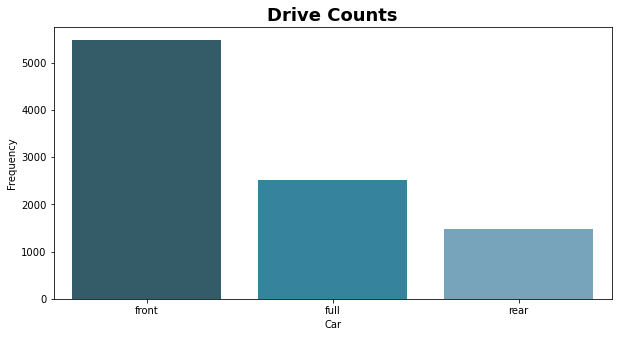

In [79]:
plt.figure(figsize=(10,5))
sns.countplot('drive',data = dt_car_v, order = dt_car_v['drive'].value_counts().index,palette="PuBuGn_d")
plt.title("Drive Counts",fontsize=18,fontweight="bold")
plt.xlabel('Car')
plt.ylabel('Frequency')
plt.show()

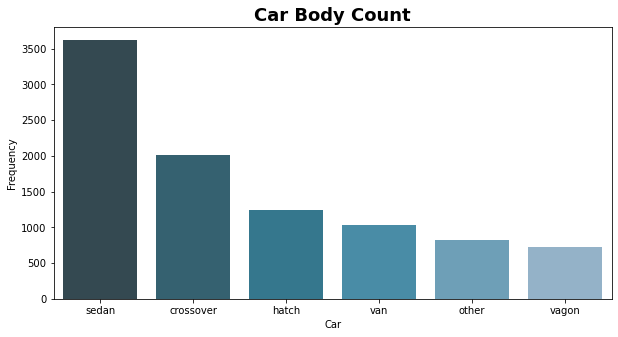

In [80]:
plt.figure(figsize=(10,5))
sns.countplot('body',data = dt_car_v, order = dt_car_v['body'].value_counts().index,palette="PuBuGn_d")
plt.title("Car Body Count",fontsize=18,fontweight="bold")
plt.xlabel('Car')
plt.ylabel('Frequency')
plt.show()

Sedan is the maximum car body sold,followed by crossover,hatch and van.

In [81]:
dt_car_v.head(1)

,car,price,body,mileage,engv,engtype,registration,year,model,drive,mileage_clean,mileage_group,price_group,year_group
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full,71.5,NaN,10001-20000,2001-2008


<a id=section504></a> 

#### 5.4 Car Manufacturing Engine Group

In [82]:
### Put each Car Manufacturing in each mileage group 

dt_car_v['engv_group'] = pd.cut(dt_car_v['engv'].dropna(),
                         [0,1,2,3,4,5,6,7],
                         labels=['<0','0.1-1','1.1-2','2.2-3','3.1-4','4.1-5','>5'], include_lowest=True) 
print('done')

done


In [83]:
dt_car_v.head(3)

,car,price,body,mileage,engv,engtype,registration,year,model,drive,mileage_clean,mileage_group,price_group,year_group,engv_group
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full,71.5,NaN,10001-20000,2001-2008,1.1-2
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear,230.5,NaN,20001-40000,2001-2008,0.1-1
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear,135.0,NaN,20001-40000,1993-2000,4.1-5


<a id=section505></a> 

#### 5.5 Pandas Profiling

In [84]:
import pandas_profiling                               # Get a quick overview for all the variables using pandas_profiling                                         
profile1 = pandas_profiling.ProfileReport(dt_car_v)
print('done')


done


In [85]:
profile1.to_file("car_post_profiling_2020.html")   

Now I have preprocessed the data, now the dataset does not contain missing values. So, the pandas profiling report which I have generated after preprocessing will give more beneficial insights. You can compare the two reports, i.e car_pre_profiling_2020.html and car_post_profiling_2020.html

In car_pre_profiling_2020.html report, observations:

In the Dataset info, Total Missing(%) = 0.0%
Number of variables = 11
Observe the updated details, Click on Toggle details to get more detailed information about each feature.
Let's look into feature available in carsale dataset in detail an Visualize them

<a id=section6></a> 

#### 6 Plotting

<a id=section601></a> 

#### 6.1 Mileage vs Price

In [86]:
# Which Engine Type (Fuel Type) is sold more ?
dt_car_v['engtype'].value_counts()   

Petrol    4341
Diesel    2950
Gas       1710
Other      462
Name: engtype, dtype: int64

Text(0.5, 1.0, 'Top 10 car brands on sale')

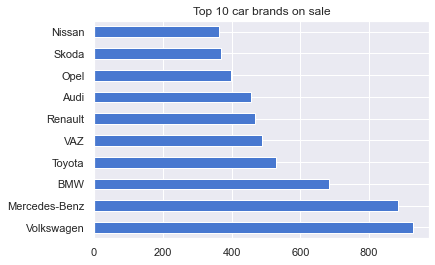

In [135]:
dt_car_v.car.value_counts().head(10).plot.barh()
plt.title("Top 10 car brands on sale")

This shows Volkswagen and Mercedes-Benz are top most brands on sale and hence these would be preferred choices for high profile people


In [88]:
dt_car_v[dt_car_v.price.isin(dt_car_v.price.nlargest())].sort_values(['car','model','body','mileage','price'])

,car,price,body,mileage,engv,engtype,registration,year,model,drive,mileage_clean,mileage_group,price_group,year_group,engv_group
4134,Bentley,449999.0,crossover,0,6.00,Petrol,yes,2016,Bentayga,full,0.0,<10,>40000,2001-2008,4.1-5
1611,Bentley,499999.0,crossover,0,6.00,Petrol,yes,2016,Bentayga,full,0.0,<10,>40000,2001-2008,4.1-5
7621,Bentley,547800.0,sedan,0,6.75,Petrol,yes,2016,Mulsanne,rear,0.0,<10,>40000,2001-2008,>5
5849,Mercedes-Benz,300000.0,other,37,5.00,Petrol,yes,2012,G 500,full,150.0,NaN,>40000,2001-2008,3.1-4
4325,Mercedes-Benz,300000.0,sedan,68,6.00,Petrol,yes,2011,S 600,rear,147.0,NaN,>40000,2001-2008,4.1-5


This shows top 5 highest price selling car and their models details and hence can be used for email marketing for high profile income group peoples to achieve sales goals

In [89]:
dt_car_v[dt_car_v.price.isin(dt_car_v.price.nsmallest())].sort_values(['car','model','body','mileage','price'])

,car,price,body,mileage,engv,engtype,registration,year,model,drive,mileage_clean,mileage_group,price_group,year_group,engv_group
3963,Audi,0.0,hatch,243,2.0,Gas,yes,1987,100,front,317.5,NaN,<5000,1977-1984,0.1-1
5042,Audi,0.0,sedan,177,1.8,Petrol,yes,1998,A4,front,206.0,NaN,<5000,1985-1992,0.1-1
244,Audi,0.0,crossover,65,3.0,Diesel,yes,2013,A6,full,231.5,NaN,<5000,2001-2008,1.1-2
7305,Audi,0.0,sedan,166,3.0,Gas,yes,2005,A6,full,231.5,NaN,<5000,1993-2000,1.1-2
5256,Audi,0.0,sedan,370,2.6,Other,yes,1997,A6,front,231.5,NaN,<5000,1985-1992,1.1-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3442,Volkswagen,0.0,van,160,2.0,Diesel,yes,2011,T6 (Transporter) ãðóç,front,148.0,NaN,<5000,2001-2008,0.1-1
3149,Volkswagen,0.0,crossover,90,3.6,Petrol,yes,2008,Touareg,full,136.5,NaN,<5000,1993-2000,2.2-3
3965,ZAZ,0.0,hatch,72,2.0,Petrol,yes,2003,1102 Òàâðèÿ,front,107.0,NaN,<5000,1993-2000,0.1-1
3551,ZAZ,0.0,hatch,130,7.0,Gas,yes,2005,1102 Òàâðèÿ,front,107.0,NaN,<5000,1993-2000,>5


This shows top 5 lowest price selling car and their models details and hence can be used for email marketing for low to middle profile income group peoples to achieve sales goals

Text(0.5, 1.0, 'Most preferred body type used in 1953-2016')

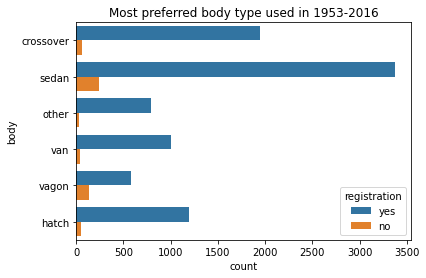

In [90]:
sns.countplot(y='body', data=dt_car_v, orient='h', hue='registration')
plt.title("Most preferred body type used in 1953-2016")

This shows the car brands having "sedan" type of body having maximum registration/sale over the years. This shows People prefers sedan type of body mostly and hence this information can be use for achieving max sale and to figure out production of units.

Text(0.5, 1.0, 'Most preferred engtype used over the years')

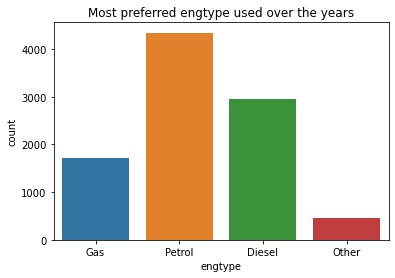

In [91]:
sns.countplot(x='engtype', data=dt_car_v, orient='h')
plt.title("Most preferred engtype used over the years")

,year,registration,RegCounts
0,2008,yes,1142
1,2007,yes,914
2,2012,yes,749
3,2011,yes,681
4,2013,yes,632


Text(0.5, 1.0, 'Years group having max sale/registration')

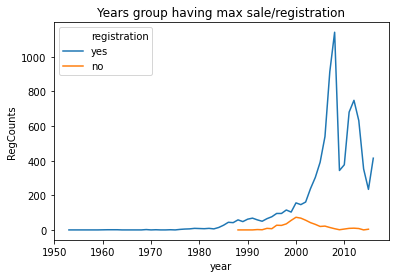

In [92]:
dt_car_v.sort_values(['car','model','body','mileage','year'])

df = dt_car_v.groupby('year')['registration'].value_counts().sort_values(ascending=False)
df = pd.DataFrame(df)
df.rename(columns={'registration': 'RegCounts'}, inplace=True)
df.reset_index(inplace=True)
display(df.head())
sns.lineplot(data=df, x='year', y='RegCounts', hue='registration')
#sns.scatterplot(data=df, x='year', y='RegCounts', hue='registration')
plt.title("Years group having max sale/registration")

This graph shows in which Year was the highest registrations, and hence shows max sale was done in the Year 2008.
This info can be use to start working/research why sale was max in this year.
What was the factors affected this sale/registrations

Text(0.5, 1.0, 'year - price lineplot (1950 - 2010)')

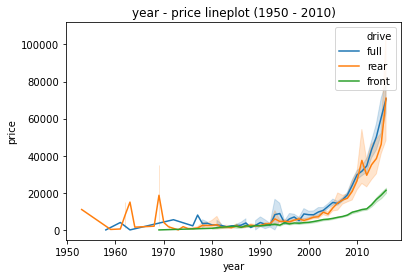

In [93]:
sns.lineplot(data=dt_car_v, y='price', x='year', hue='drive')
plt.title("year - price lineplot (1950 - 2010)")

Over the years full and rear car price has increase compared to front drive

Text(0.5, 1.0, 'year - price lineplot (2010 - 2016)')

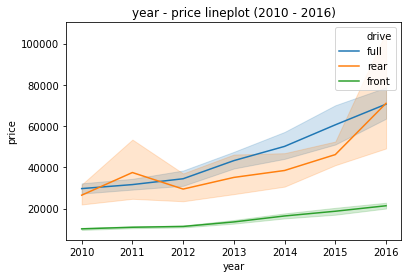

In [329]:
sns.lineplot(data=dt_car_v[dt_car_v.year >= 2010], y='price', x='year', hue='drive')
plt.title("year - price lineplot (2010 - 2016)")

The above graphs shows the Price distribution over the years (1953-2016). As the years increase, we cannot comment on the price increase, but in general, there has been an increase in price in recent years.

Text(0.5, 1.0, 'mileage - price line Plot')

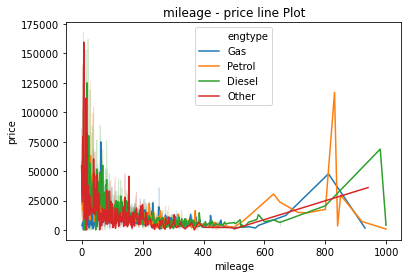

In [94]:
sns.lineplot(x='mileage',y='price',data=dt_car_v,hue='engtype')
plt.title("mileage - price line Plot")

The above graph shows line plot/relation between mileage and price. We can't comment on the price increase/decrease over the mileage but this shows, price changing accordingly based on mileage value. So price is varying based on mileage too and this should be consider as a factor for the calculation.

Text(0.5, 1.0, 'Price distribution over the year w.r.t to engtype')

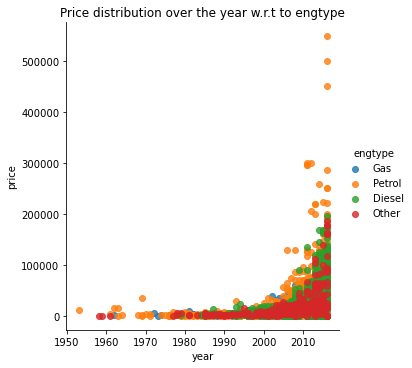

In [96]:
sns.lmplot('year','price', dt_car_v, fit_reg=False, hue='engtype')
plt.title("Price distribution over the year w.r.t to engtype")

The above multivariate graphs shows the Price distribution over the years w.r.t engtype. As the years increase, this shows there is significant increase in prices of cars models having engine tyep = "Petrol" as compared to "Gas" and "Diesel".

In [97]:
count=dt_car_v['car'].value_counts()[1:5]
count
#df_merge['Sodium'].value_counts()[>1]


Mercedes-Benz    885
BMW              684
Toyota           529
VAZ              488
Name: car, dtype: int64

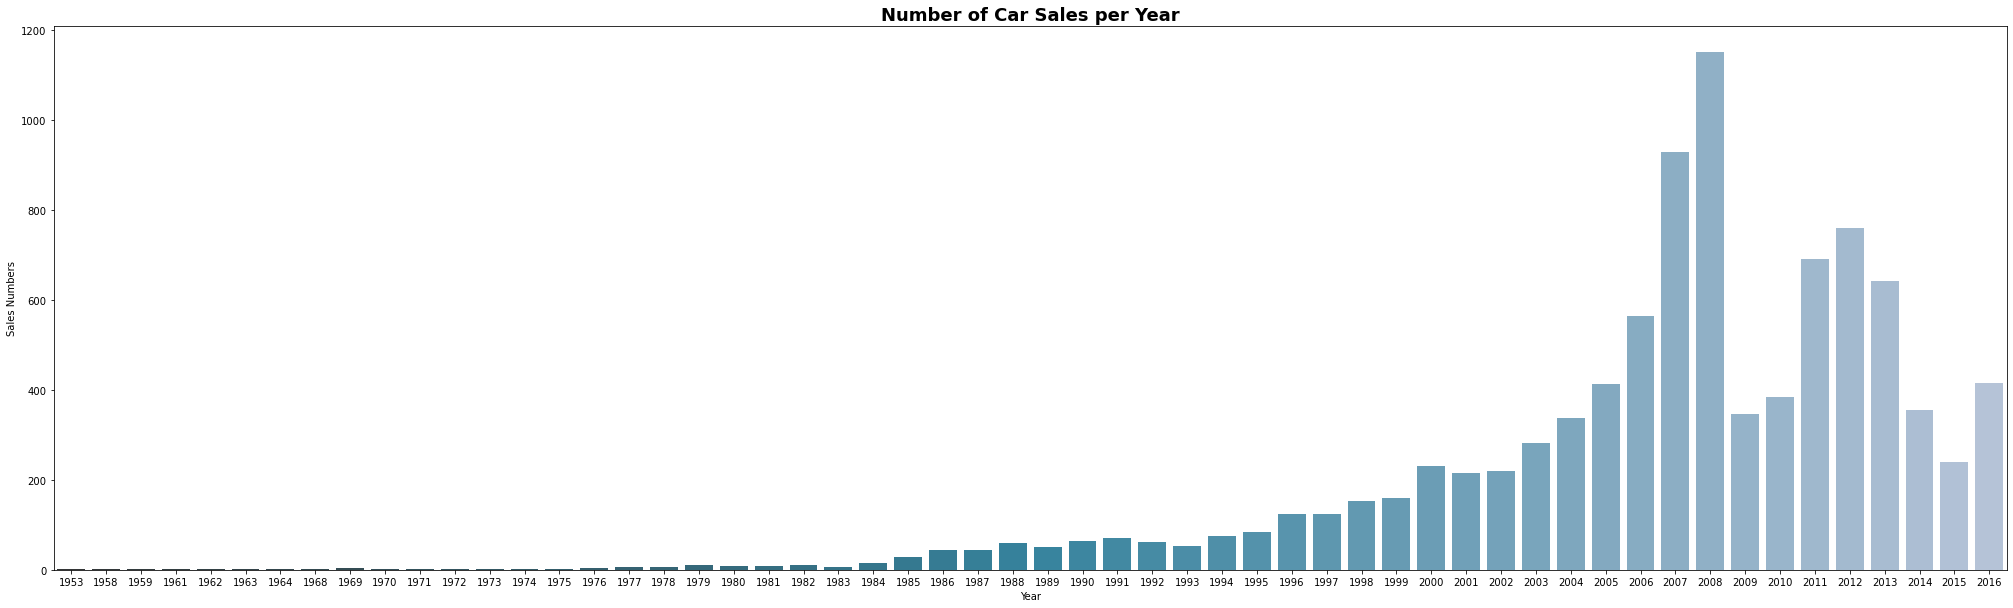

In [98]:
#ascending=False
plt.figure(figsize=(35,10))
sns.countplot('year',data = dt_car_v,palette="PuBuGn_d")
plt.title("Number of Car Sales per Year",fontsize=18,fontweight="bold")
plt.xlabel('Year')
plt.ylabel('Sales Numbers')
plt.show()

Maximum cars soled in 2008, gradual increase in sales till 1999, car sales picked after 2000 peaked in 2008 , show decline after 2008,could be related to price of the car

Text(0.5, 1.0, 'Car Sales : Drive')

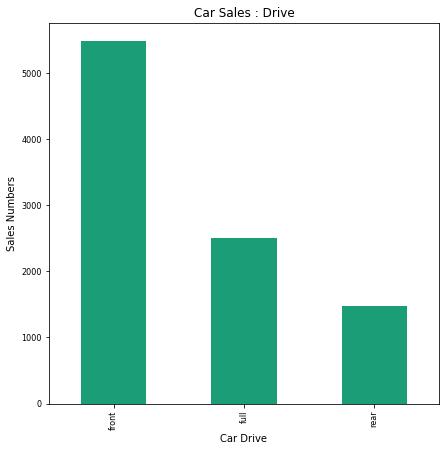

In [99]:
#Which is the most common category on menu sort_values(ascending=True)
plt.figure(figsize = (10, 6))
#dt_car_v.groupby('year')['car'].order= dt_car_v['year'].value_counts().plot(kind='bar',order=dt_car_v['year'],color='g')

#order = dt_car_v['year'].value_counts()
#plt.ylabel('Car Sales Count')
#plt.title('History : Car Sales Roadmap')

dt_car_v['drive'].order= dt_car_v['drive'].value_counts().plot.bar(figsize=(7,7), colormap='Dark2', fontsize=8)
plt.xlabel('Car Drive')
plt.ylabel('Sales Numbers')
plt.title('Car Sales : Drive')


Maximum number of cars sold are front drive, followed by full and rear.

<a id=section602></a> 

#### 6.2 Price Vs Engine

In [100]:
dt_car_v.head(2)

,car,price,body,mileage,engv,engtype,registration,year,model,drive,mileage_clean,mileage_group,price_group,year_group,engv_group
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full,71.5,NaN,10001-20000,2001-2008,1.1-2
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear,230.5,NaN,20001-40000,2001-2008,0.1-1


Text(0.5, 1.0, 'Price Group vs Engine Type')

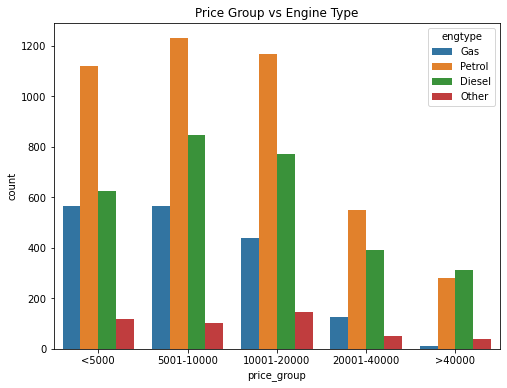

In [101]:
fig,ax =plt.subplots(figsize=(8,6))
sns.countplot(data = dt_car_v,x = 'price_group', hue='engtype')
plt.title('Price Group vs Engine Type')

- '< 5000', Price Group Petrol Engine Type is sold more
- '5001-10000', Price Group Petrol Engine Type is sold more
- '10001-20000', Price Group Petrol Engine Type is sold more
- '>40000', Price Group Diesel Engine Type is sold more

Text(0, 0.5, 'Sales Price (in million INR)')

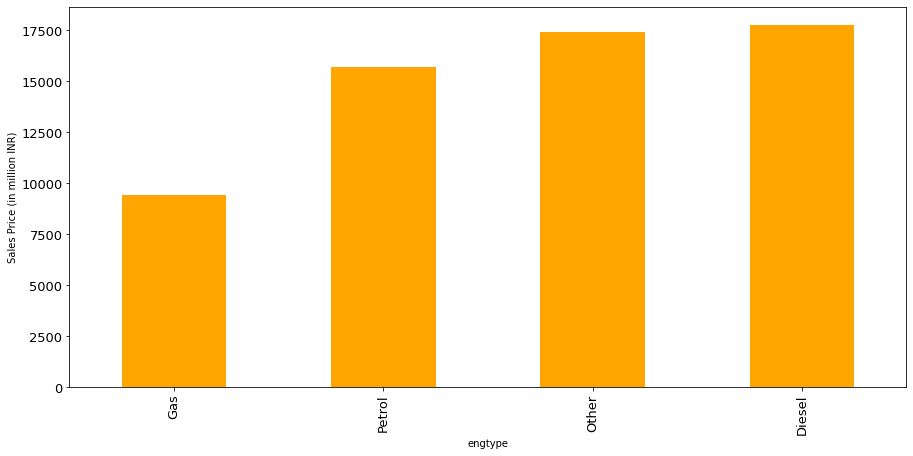

In [102]:
dt_car_v.groupby(['engtype'])['price'].mean().sort_values().plot(kind='bar', figsize=(15,7), fontsize=13, color='orange')
plt.ylabel('Sales Price (in million INR)')

Average price of Diesel Engine Type is more than Petrol, Gas and other engine type.

<a id=section603></a> 

#### 6.3 Top Ten Cars

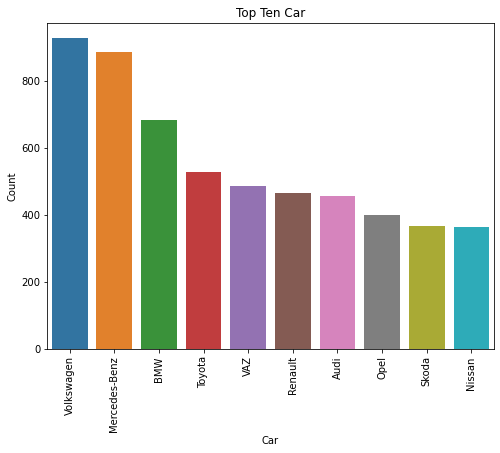

In [103]:
from collections import Counter
country_count = Counter(dt_car_v['car'].dropna().tolist()).most_common(10)
car_idx = [car[0] for car in country_count]
car_val = [car[1] for car in country_count]
fig,ax = plt.subplots(figsize=(8,6))
sns.barplot(x = car_idx,y=car_val ,ax =ax)
plt.title('Top Ten Car')
plt.xlabel('Car')
plt.ylabel('Count')
ticks = plt.setp(ax.get_xticklabels(),rotation=90)

Volkswagen is the highest car sold over years.

<AxesSubplot:xlabel='engv'>

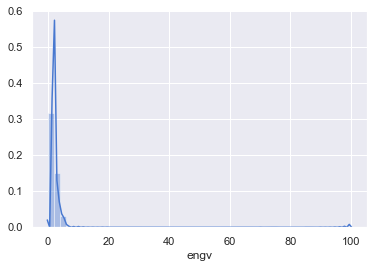

In [140]:
## View the mileage distribution 
sns.set(color_codes=True)                       # Plot a histogram of the milages (remove any NaN values)
sns.set_palette(sns.color_palette("muted"))

sns.distplot(dt_car_v["engv"].dropna())

Text(0.5, 1.0, 'Car Sales by Engine V')

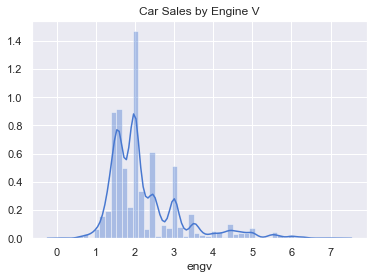

In [147]:
sns.distplot(dt_car_v[dt_car_v.engv<8].engv)
plt.title('Car Sales by Engine V')

Text(0, 0.5, 'Sales Price (in million INR)')

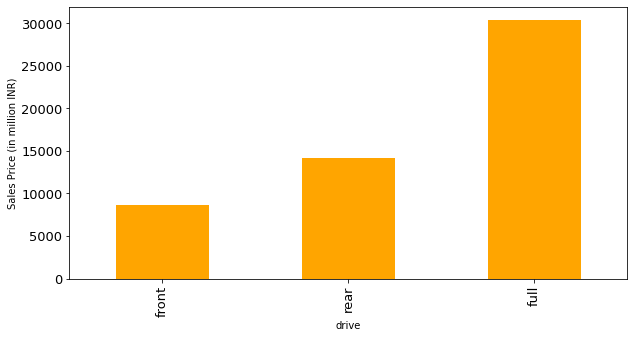

In [104]:
dt_car_v.groupby(['drive'])['price'].mean().sort_values().plot(kind='bar', figsize=(10,5), fontsize=13, color='orange')
plt.ylabel('Sales Price (in million INR)')

Full drive car sales proce is more than rear and front drive.

Text(0, 0.5, 'Sales Price (in million INR)')

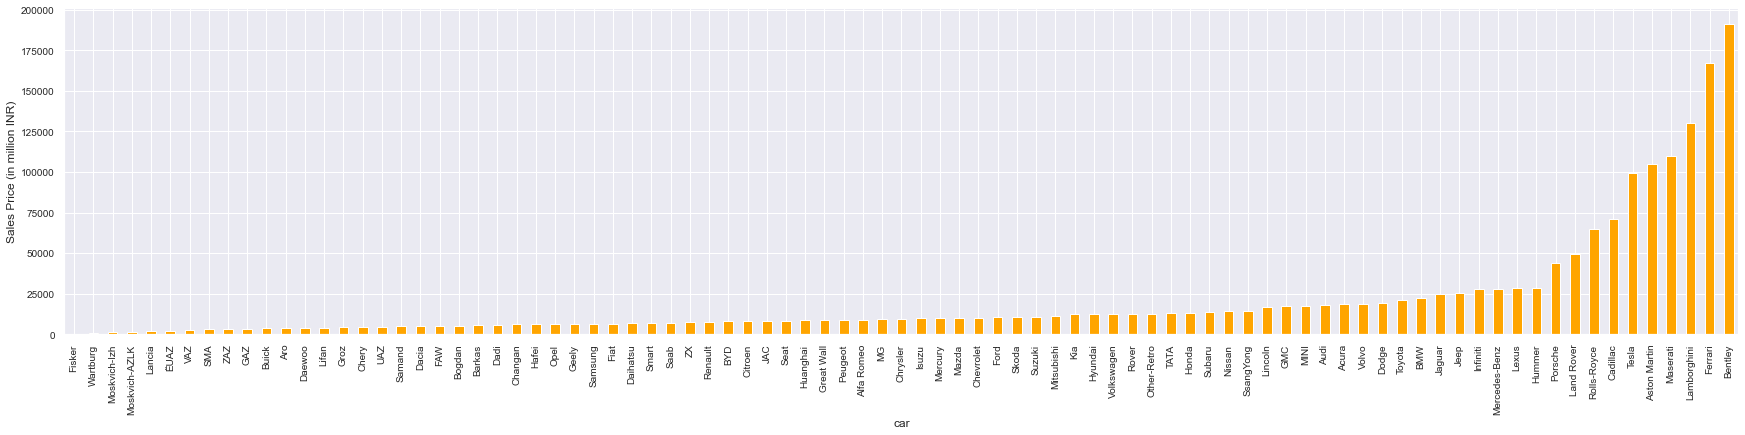

In [128]:
dt_car_v.groupby(['car'])['price'].mean().sort_values().plot(kind='bar', figsize=(30,6), fontsize=10, color='orange')
plt.ylabel('Sales Price (in million INR)')

Text(0, 0.5, 'Sales Price (in million INR)')

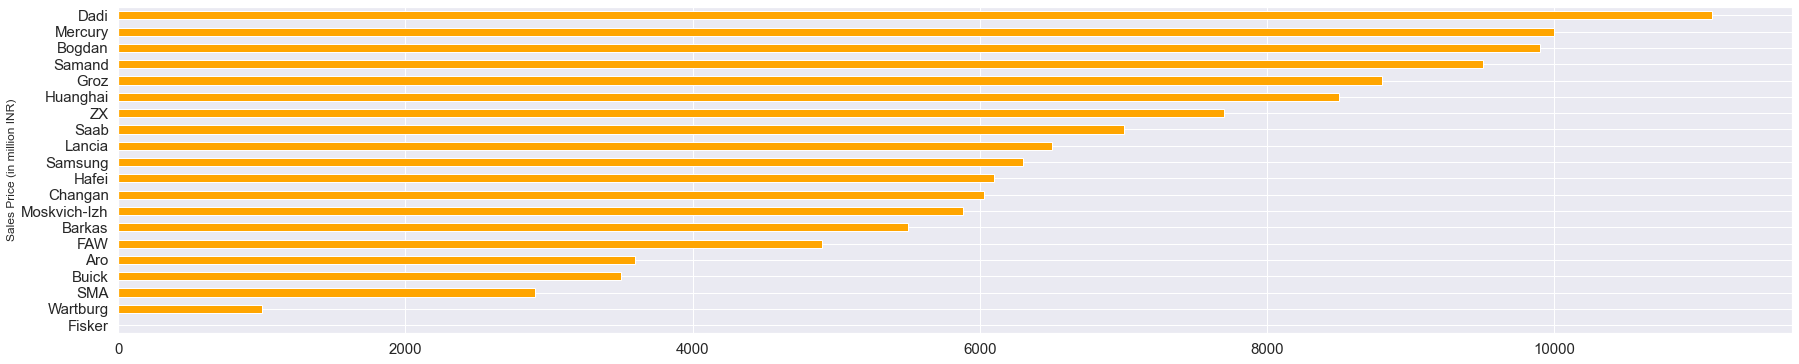

In [133]:
dt_car_v.groupby(['car'])['price'].sum().sort_values()[:20].plot(kind='barh', figsize=(30,6), fontsize=15, color='orange')
plt.ylabel('Sales Price (in million INR)')

Bentley has the highest car price over the year.

Text(0.5, 1.0, 'Countplot for number of Cars Sold Per Year')

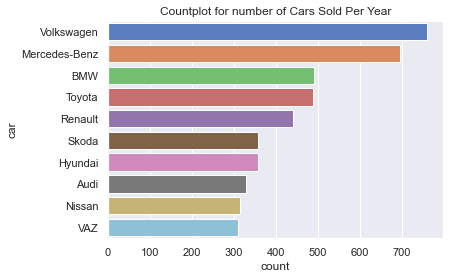

In [137]:
cars = dt_car_v.groupby('car').filter(lambda x: len(x)>100)
cars1 = cars[cars.year>2000]
#sns.factorplot(y='car', hue='engType', kind='count', data=cars1);
sns.countplot(y='car',data = cars1, order = cars1.car.value_counts().head(10).index).set_title('Countplot for number of Cars Sold Per Year')

<a id=section604></a> 

#### 6.4 Mileage Vs Engine Type

Text(0.5, 1.0, 'Mileage Group vs Drive')

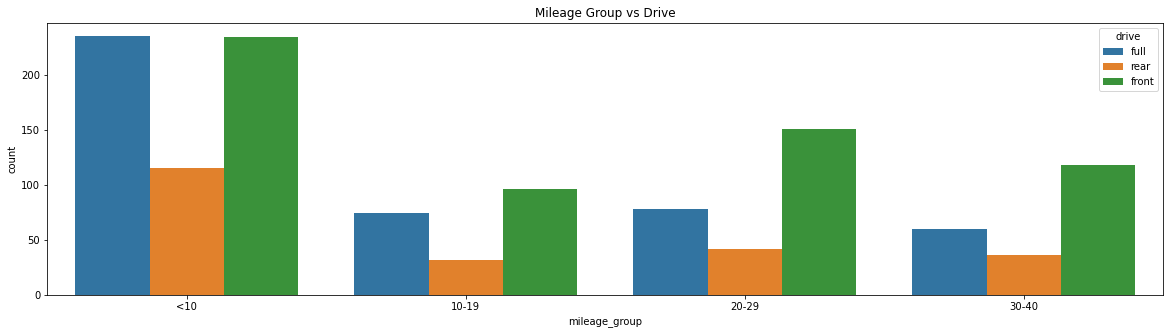

In [110]:
fig,ax =plt.subplots(figsize=(20,5))
sns.countplot(data = dt_car_v,x = 'mileage_group', hue='drive')
plt.title('Mileage Group vs Drive')

Almost same count of Front and Rear Drive in >10 millage group,between 10-19 milage group more front drive follwed by rear, between 20-29 milage group more front drive follwed by rear,In 30-39 againfront drive count is more. 

Text(0.5, 1.0, 'Mileage vs Car body')

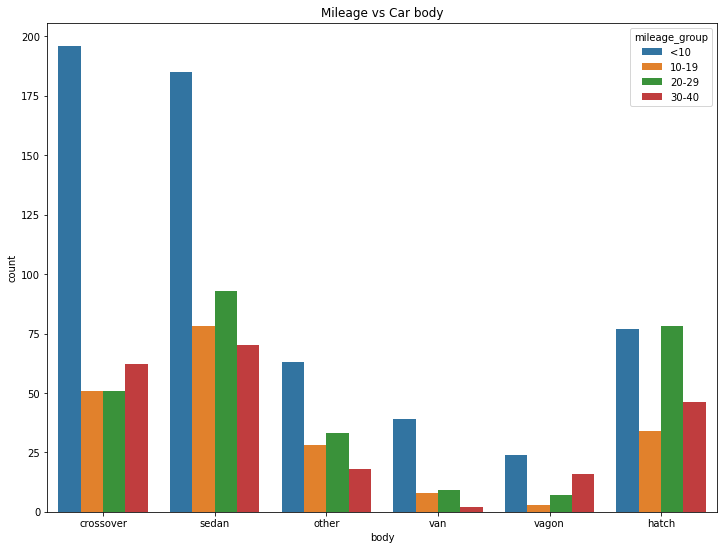

In [111]:
fig,ax =plt.subplots(figsize=(12,9))
sns.countplot(data = dt_car_v,x = 'body', hue='mileage_group')
plt.title('Mileage vs Car body')

sedan has maxmimim car in range 30 to 40 milage.



<a id=section605></a> 

#### 6.5 Milage Histrogram 

<AxesSubplot:xlabel='mileage'>

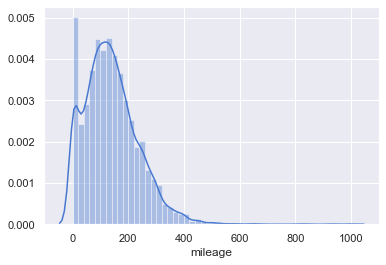

In [112]:
## View the mileage distribution 
sns.set(color_codes=True)                       # Plot a histogram of the milages (remove any NaN values)
sns.set_palette(sns.color_palette("muted"))

sns.distplot(dt_car_v["mileage"].dropna())

Milage is spread across 0-450

<a id=section606></a> 

#### 6.6 Registration Vs Engine Type 

Text(0.5, 1.0, 'registration vs engtype')

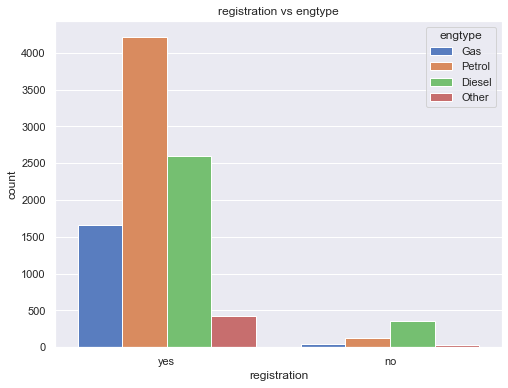

In [113]:
fig,ax =plt.subplots(figsize=(8,6))
sns.countplot(data = dt_car_v,x = 'registration', hue='engtype')
plt.title('registration vs engtype')

Over all Petrol Cars are more registration,follwed by Diesel and Gas

<a id=section607></a> 

#### 6.7 Registration Vs Engine Type ( Pie Chart)

Text(0.5, 1.0, 'Registration (Other)')

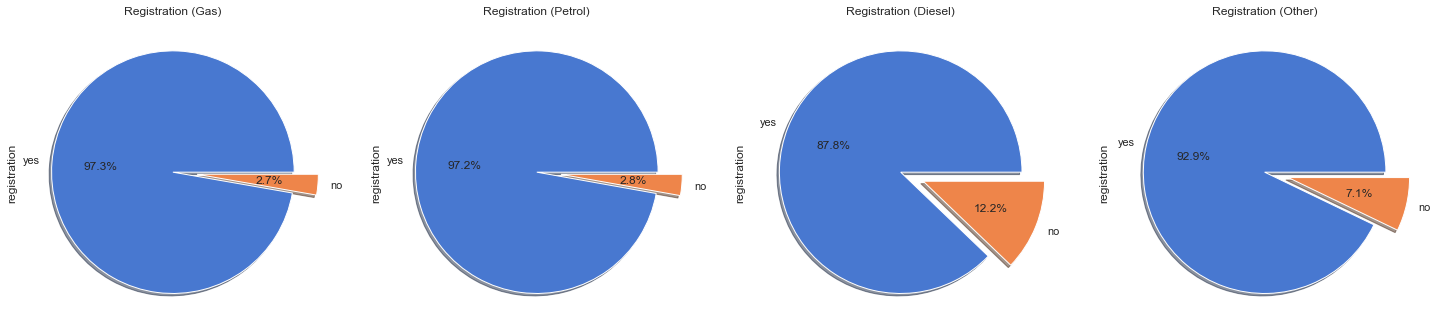

In [114]:
f,ax = plt.subplots(1,4,figsize=(25,6))
dt_car_v['registration'][dt_car_v['engtype'] =='Gas'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[0],shadow=True)
dt_car_v['registration'][dt_car_v['engtype'] == 'Petrol'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[1],shadow=True)
dt_car_v['registration'][dt_car_v['engtype'] == 'Diesel'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[2],shadow=True)
dt_car_v['registration'][dt_car_v['engtype'] == 'Other'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[3],shadow=True)
ax[0].set_title('Registration (Gas)')
ax[1].set_title('Registration (Petrol)')
ax[2].set_title('Registration (Diesel)')
ax[3].set_title('Registration (Other)')

Out of the total Gas Fuel cars,97.3%,Gas Fuel cars are registored followed by Petrol 97.2% and Diesel 87.8%

<a id=section608></a> 

#### 6.8 Registration Vs Drive ( Pie Chart)


Text(0.5, 1.0, 'Registration (full)')

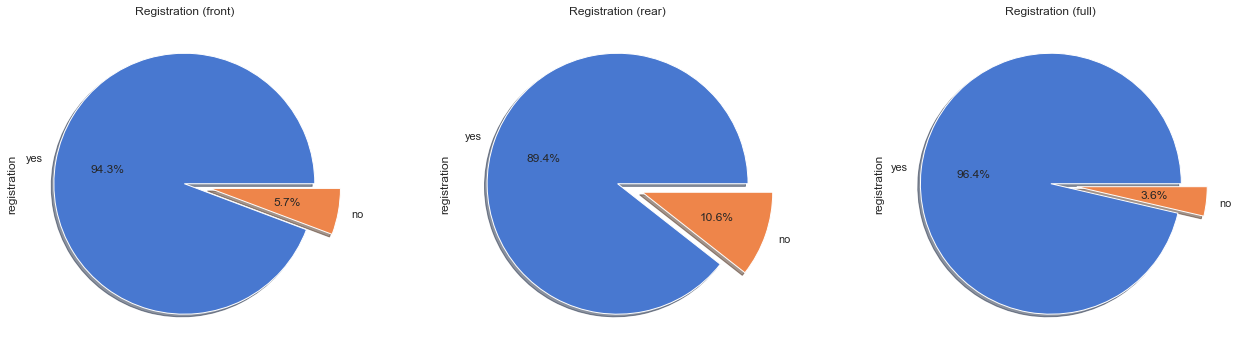

In [115]:
f,ax = plt.subplots(1,3,figsize=(22,6))
dt_car_v['registration'][dt_car_v['drive'] =='front'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[0],shadow=True)
dt_car_v['registration'][dt_car_v['drive'] == 'rear'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[1],shadow=True)
dt_car_v['registration'][dt_car_v['drive'] == 'full'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[2],shadow=True)
ax[0].set_title('Registration (front)')
ax[1].set_title('Registration (rear)')
ax[2].set_title('Registration (full)')

Over all 94.2% Front cars are registored out of 100%, 89% rear car are registored and 96.5% full cars are registored.

Text(0.5, 1.0, 'Pie chart showing maximum Engine Type Sales')

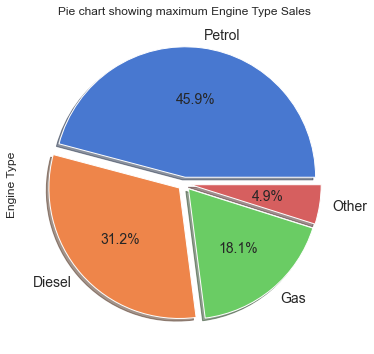

In [116]:
dt_car_v['engtype'].value_counts().plot.pie(explode=[0.05,0.05,0.05,0.05],fontsize=14,autopct='%3.1f%%',figsize=(25,6),shadow=True)
plt.ylabel('Engine Type')
plt.title('Pie chart showing maximum Engine Type Sales')

Petrol Engine type  showing maximum sales over Diesel, Gas and other fuel type

Text(0.5, 1.0, 'Pie chart showing Registered Cars')

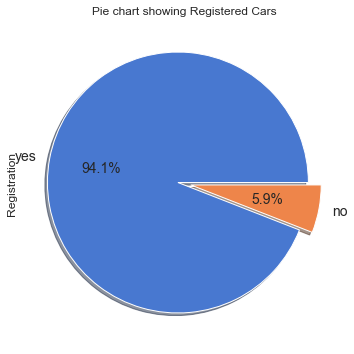

In [117]:
dt_car_v['registration'].value_counts().plot.pie(explode=[0.05,0.05],fontsize=14,autopct='%3.1f%%',figsize=(25,6),shadow=True)
plt.ylabel('Registration')
plt.title('Pie chart showing Registered Cars')

Maximum numbers of cars has been registered

In [119]:
dt_car_v.head(1)

,car,price,body,mileage,engv,engtype,registration,year,model,drive,mileage_clean,mileage_group,price_group,year_group,engv_group
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full,71.5,NaN,10001-20000,2001-2008,1.1-2


<a id=section609></a> 

#### 6.9 Correlation of Features

Text(0.5, 1.0, 'Plot showing the variation of Price with Year')

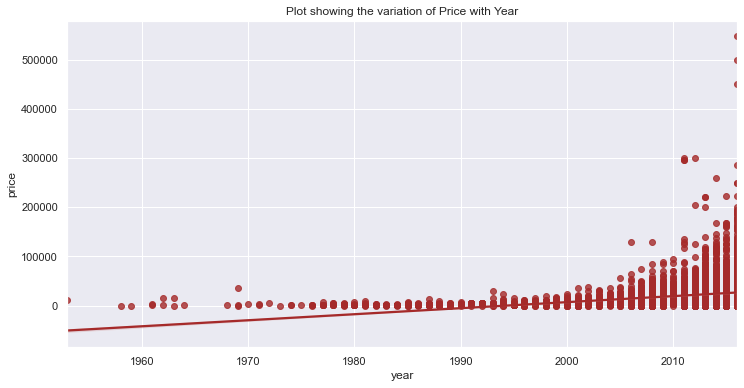

In [120]:
# Using seaborn's regplot function to plot the scatter plot for the Year and Price columns with the regression line.

plt.figure(figsize=(12,6))
sns.regplot(data=dt_car_v, x='year', y='price', color='brown')

plt.title('Plot showing the variation of Price with Year')

Over the years price of the cars have increased and more increase can be seen after 2008

Text(0.5, 1.0, 'Scatter plot showing the variation of engine with mileage present in each item')

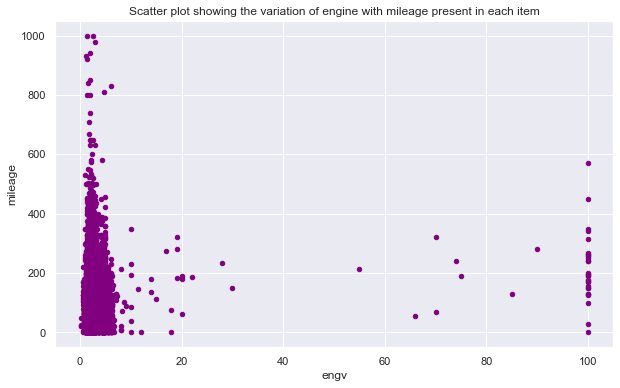

In [121]:
# Using pandas plot function to plot the scatter plot for the engine and mileage columns.
# Using the kind='scatter' to plot a scatter plot.

dt_car_v.plot(kind='scatter', x='engv', y='mileage', figsize=(10, 6), color='purple', grid=True)

plt.title('Scatter plot showing the variation of engine with mileage present in each item')

more correlation between 0 to 10 Engine Version and mileage

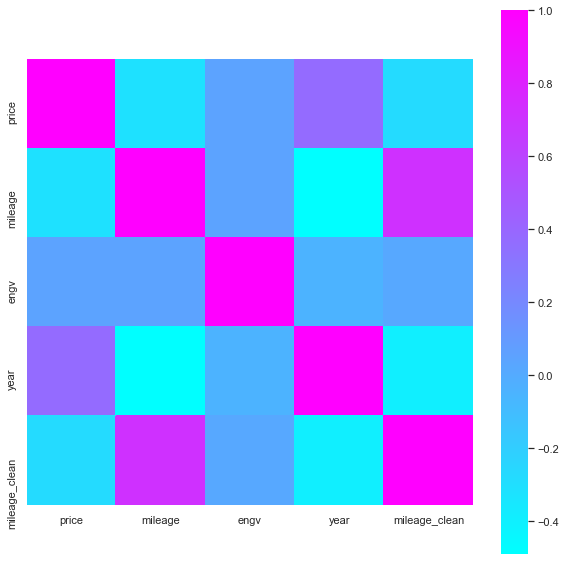

In [122]:
features_correlation = dt_car_v.corr()
plt.figure(figsize=(10,10))
sns.heatmap(features_correlation,vmax=1,square=True,annot=False,cmap='cool')
plt.show()

Text(0.5, 1.0, 'Heatmap for Highest correlated features for Carsale datset')

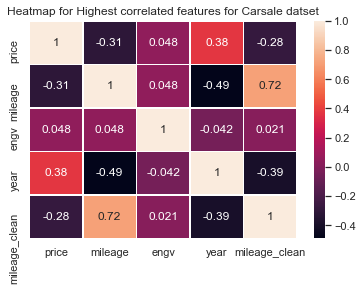

In [123]:
sns.heatmap(dt_car_v.corr(),annot=True, linewidths=.5)
plt.title("Heatmap for Highest correlated features for Carsale datset")

Above graph shows the which features are most relative/correlated and dependent on each other. Hence it looks price and year are higly correlated to each other and price may change (increase/decrease over the period of time)

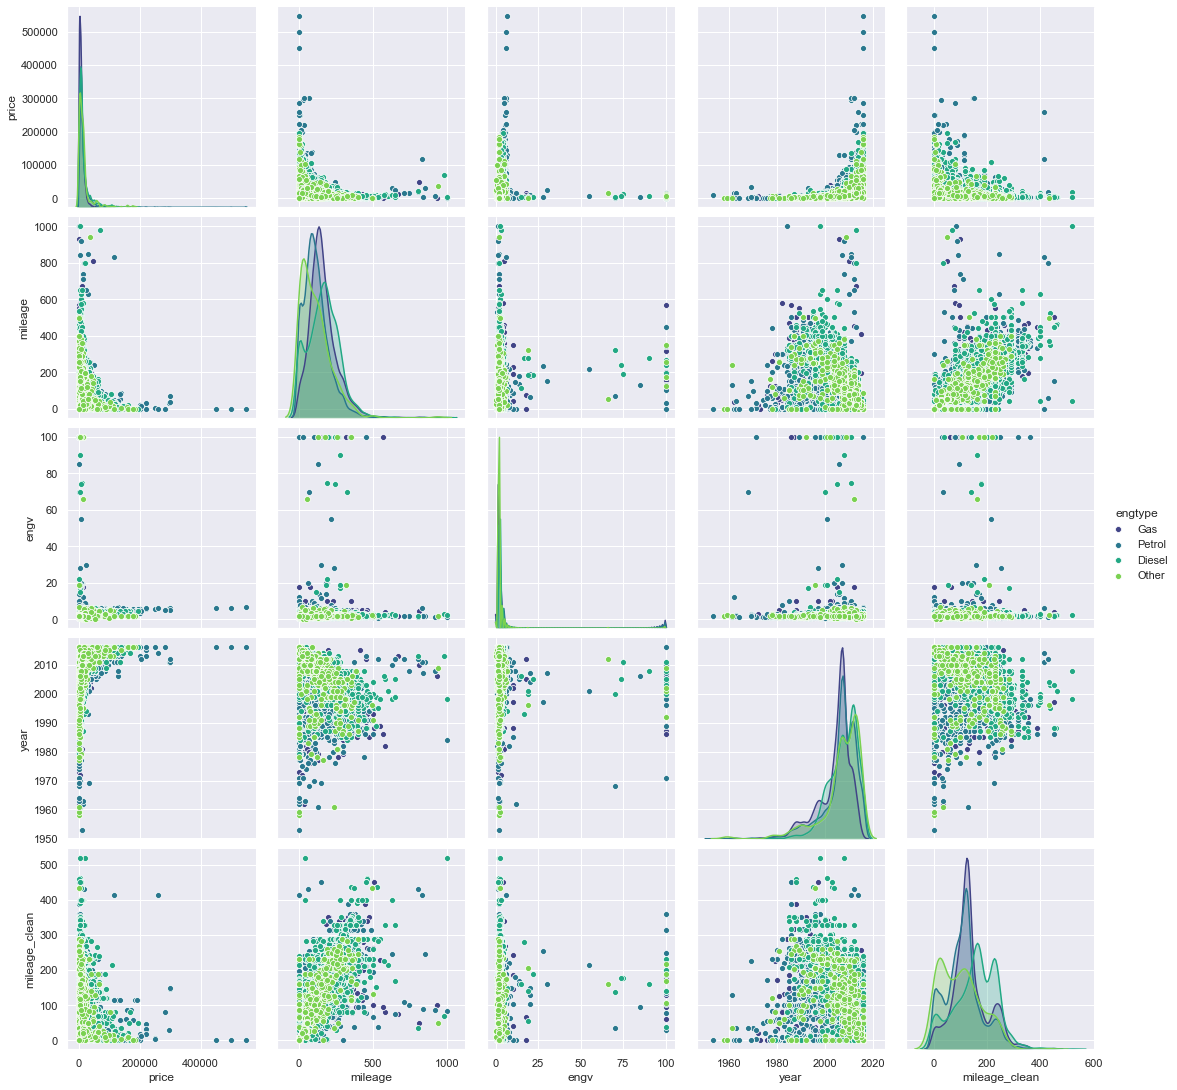

In [124]:
sns.pairplot(dt_car_v, hue='engtype', palette="viridis", height=3)

This pairplot gives the observations which already have been referred from other graphs above : those are
Price varying based on Year and Mileage
As Year increases there is increase in Petrol engine type vehicles's prices which also depending on mileage too.

<a id=section7></a> 
### Conclusion

    ####### Some Questions i had initially  
    -How many cars for each module sold in each year?
      Study Increase after 1985, maximum car soled in 2008.
    -Highest Cars body sold most ?
      Sedan is the maximum car body sold,followed by crossover,hatch and van.  
    -Highest Car sold each year ?
      Bentley has the highest car sales over the year.
    -Which Car model gives highest average ?
      Sedan has maxmimim car in range 30 to 40 milage,The petrol engine type is preferred over diesel & gas.
    -Are most of the registration done ?
     94% cars are registored
    -Which is costly car ?
     Bentley is costly car.
    -Which brand of cars is the most selling brand?
     Volkswagen and Mercedes-Benz are topmost brands on sale

    I learnt how to do exploratory data analysis using Pandas plotting.
    Used matplotlib and seaborn to develop better insights
    Used pandas profiling feature to generate an html report containing all the information present in the dataset
    I have drawn coorelated chart,I get to know what are the features on which price is highly positively and negatively         coorelated,looks price and year are higly correlated to each other and price may change (increase/decrease over the period of time)
    I have seen the impact of columns like mileage, year and engType on the Price increase/decrease rate.
      
